In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
# Load the dataset
file_path = '/content/drive/MyDrive/ML Datasets/house_dataset.csv'
df = pd.read_csv(file_path)

In [ ]:
print(df)

In [ ]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1314.000000,1084.00000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1307.000000,1314.000000,1314.000000,...,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000
mean,56.815068,70.04797,10433.886606,6.109589,5.594368,1971.146119,1984.848554,103.751339,447.638508,47.028919,...,92.422374,46.688737,21.840944,3.788432,15.918569,3.065449,46.837139,6.361492,2007.792998,181307.531202
std,42.143591,24.55054,9443.074309,1.380481,1.119922,30.349148,20.600410,179.572736,458.746136,162.842821,...,122.957434,66.192705,61.247266,30.881110,57.351579,42.341109,522.146013,2.692305,1.321132,78402.449093
min,20.000000,21.00000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.00000,7536.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,50.000000,69.00000,9485.000000,6.000000,5.000000,1972.500000,1993.000000,0.000000,389.000000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163250.000000
75%,70.000000,80.00000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,166.000000,715.500000,0.000000,...,168.000000,68.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214375.000000
max,190.000000,313.00000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,745000.000000


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
print(df.isnull().sum())

MSSubClass         0
MSZoning           0
LotFrontage      230
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64


In [20]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Only show columns with missing values

# Convert to DataFrame for better formatting
missing_df = missing_values.reset_index()
missing_df.columns = ['Feature', 'MissingValues']
print(missing_df)

         Feature  MissingValues
0    LotFrontage            230
1          Alley           1231
2     MasVnrType            779
3     MasVnrArea              7
4       BsmtQual             31
5       BsmtCond             31
6   BsmtExposure             32
7   BsmtFinType1             31
8   BsmtFinType2             32
9     Electrical              1
10   FireplaceQu            616
11    GarageType             73
12   GarageYrBlt             73
13  GarageFinish             73
14    GarageQual             73
15    GarageCond             73
16        PoolQC           1307
17         Fence           1049
18   MiscFeature           1265


In [78]:
columns_to_drop = [
                   # Unstable Features
                   'Alley','MasVnrType', 'FireplaceQu', 'PoolQC',
                   'Fence', 'MiscFeature',
                   #Use Less Features
                   'Street', 'Utilities', 'LandSlope','Neighborhood',
                   'Condition1','Condition2','BldgType','RoofMatl',
                   'RoofStyle','Exterior1st','Exterior2nd','ExterCond',
                   'Foundation','BsmtCond','BsmtFinType2', 'Heating',
                   'HeatingQC','CentralAir','Electrical','Functional',
                   'GarageType','GarageQual','GarageCond','PavedDrive',
                   'SaleType','SaleCondition','MasVnrArea']
df = df.drop(columns=columns_to_drop)

In [79]:
# Loop through all categorical columns and print their value counts
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nValue counts for column: {col}")
    print(df[col].value_counts())


Value counts for column: MSZoning
MSZoning
RL         1033
RM          198
FV           58
RH           15
C (all)      10
Name: count, dtype: int64

Value counts for column: LotShape
LotShape
Reg    827
IR1    438
IR2     40
IR3      9
Name: count, dtype: int64

Value counts for column: LandContour
LandContour
Lvl    1177
Bnk      56
HLS      47
Low      34
Name: count, dtype: int64

Value counts for column: LotConfig
LotConfig
Inside     951
Corner     226
CulDSac     89
FR2         44
FR3          4
Name: count, dtype: int64

Value counts for column: HouseStyle
HouseStyle
1Story    646
2Story    398
1.5Fin    145
SLvl       59
SFoyer     35
1.5Unf     13
2.5Unf     11
2.5Fin      7
Name: count, dtype: int64

Value counts for column: ExterQual
ExterQual
TA    813
Gd    441
Ex     47
Fa     13
Name: count, dtype: int64

Value counts for column: BsmtQual
BsmtQual
TA    584
Gd    557
Ex    111
Fa     31
Name: count, dtype: int64

Value counts for column: BsmtExposure
BsmtExposure
No   

In [80]:
#print(df['BldgType'].value_counts())

In [8]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,HouseStyle,OverallQual,OverallCond,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,2Story,7,5,...,0,61,0,0,0,0,0,2,2008,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,1Story,6,8,...,298,0,0,0,0,0,0,5,2007,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,2Story,7,5,...,0,42,0,0,0,0,0,9,2008,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,2Story,7,5,...,0,35,272,0,0,0,0,2,2006,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,2Story,8,5,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,20,FV,62.0,7500,Reg,Lvl,Inside,1Story,7,5,...,0,113,0,0,0,0,0,10,2009,185000
1310,60,RL,62.0,7917,Reg,Lvl,Inside,2Story,6,5,...,0,40,0,0,0,0,0,8,2007,175000
1311,20,RL,85.0,13175,Reg,Lvl,Inside,1Story,6,6,...,349,0,0,0,0,0,0,2,2010,210000
1312,70,RL,66.0,9042,Reg,Lvl,Inside,2Story,7,9,...,0,60,0,0,0,0,2500,5,2010,266500


Apply for chk, we can apply mean function or mode?

In [89]:
#print(df['MasVnrArea'].value_counts())

In [ ]:
df['MasVnrArea'].head(5)

,MasVnrArea
0,196.0
1,0.0
2,162.0
3,0.0
4,350.0


In [81]:
columns_to_fill = ['LotFrontage']

for col in columns_to_fill:
    df[col].fillna(df[col].mean(), inplace=True)

<ipython-input-81-26b5789faeb9>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [82]:
columns_to_fill = ['BsmtQual', 'BsmtExposure', #'BsmtCond'
                   'BsmtFinType1', #'GarageType', #'BsmtFinType2'
                   'GarageFinish'] #,'GarageQual', ,'GarageCond'

for col in columns_to_fill:
    df[col].fillna(df[col].mode()[0], inplace=True) #mode_value

<ipython-input-82-69300ad4d695>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True) #mode_value


In [83]:
df['GarageYrBlt'].fillna(method='ffill', inplace=True)

<ipython-input-83-b97e9b0f3c35>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageYrBlt'].fillna(method='ffill', inplace=True)
<ipython-input-83-b97e9b0f3c35>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['GarageYrBlt'].fillna(method='ffill', inplace=True)


In [84]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Only show columns with missing values

# Convert to DataFrame for better formatting
missing_df = missing_values.reset_index()
missing_df.columns = ['Feature', 'MissingValues']
print(missing_df)

Empty DataFrame
Columns: [Feature, MissingValues]
Index: []


In [85]:
print(df.columns.tolist())

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'LotConfig', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [86]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['MSZoning', 'LotShape', 'LandContour','LotConfig',
                     'HouseStyle','ExterQual','BsmtQual','BsmtExposure',
                     'BsmtFinType1','KitchenQual','GarageFinish']
le = LabelEncoder()
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col].astype(str))

In [87]:
from sklearn.preprocessing import MinMaxScaler

year_columns = ['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'] #,'SalePrice'
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
columns_to_scale = [col for col in numerical_cols if col not in year_columns]

scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [88]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,HouseStyle,OverallQual,OverallCond,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.235294,0.75,0.150685,0.033420,1.0,1.0,1.0,0.714286,0.666667,0.500,...,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,2008,0.244473
1,0.000000,0.75,0.202055,0.038795,1.0,1.0,0.5,0.285714,0.555556,0.875,...,0.404891,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,2007,0.206450
2,0.235294,0.75,0.160959,0.046507,0.0,1.0,1.0,0.714286,0.666667,0.500,...,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,2008,0.265596
3,0.294118,0.75,0.133562,0.038561,0.0,1.0,0.0,0.714286,0.666667,0.500,...,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,2006,0.148007
4,0.235294,0.75,0.215753,0.060576,0.0,1.0,0.5,0.714286,0.777778,0.500,...,0.260870,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,2008,0.302915


Simple Linear Regression

In [61]:
X = df[['YearBuilt']]
y = df['SalePrice']

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 0.01
R² Score: 0.29


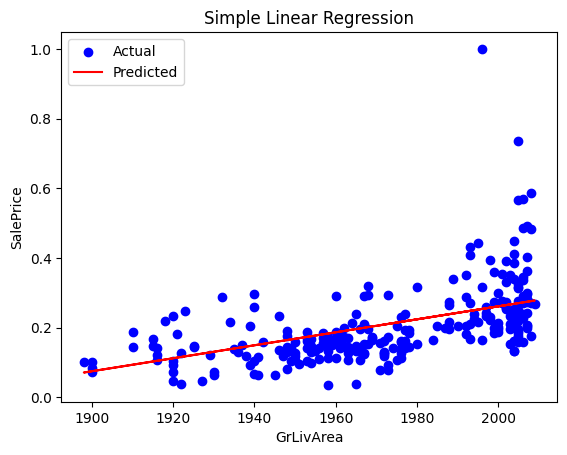

In [63]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

In [64]:
# Cross-validated R2 score
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Linear Regression - Cross-validated R2:", scores.mean())

# Check RMSE on test set
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Linear Regression - RMSE on test set:", rmse)

Linear Regression - Cross-validated R2: 0.2695486886092339
Linear Regression - RMSE on test set: 0.09448676296568917


Ridge Regression

In [55]:
X = df.drop(columns='SalePrice')
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Ridge Regression model
ridge = Ridge(alpha=1.0)  # You can tune alpha
ridge.fit(X_train_scaled, y_train)

Ridge()

In [57]:
y_pred = ridge.predict(X_test_scaled)

In [58]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.0046
R² Score: 0.6340


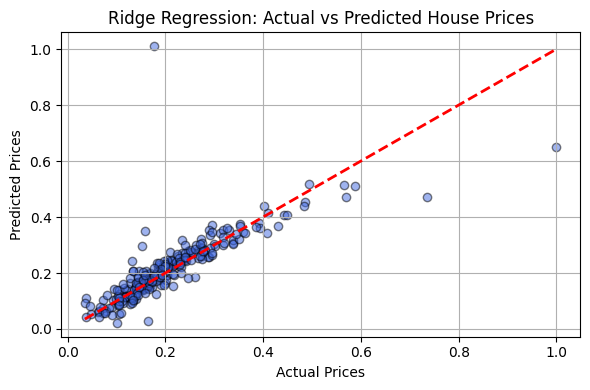

In [59]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.5, color='royalblue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Ridge Regression: Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
from sklearn.linear_model import RidgeCV

# Define range of alphas (regularization strengths)
alphas = np.logspace(-4, 4, 50)

# Ridge with cross-validation to find best alpha
ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)

# Evaluate
print("Best alpha (Ridge):", ridge_cv.alpha_)
y_pred_ridge = ridge_cv.predict(X_test)
print("Ridge R2 Score:", r2_score(y_test, y_pred_ridge))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

Best alpha (Ridge): 0.5689866029018293
Ridge R2 Score: 0.6563572645173209
Ridge RMSE: 0.06574803126212701


Lesso Regression

In [65]:
X = df.drop(columns='SalePrice')
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
from sklearn.linear_model import Lasso

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(alpha=0.05)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.05)

In [67]:
y_pred = lasso.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.0070
R² Score: 0.4459


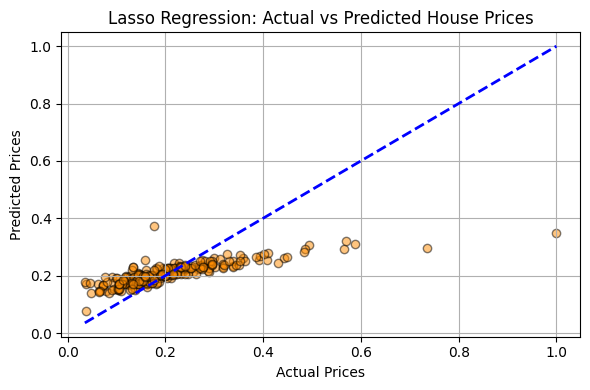

In [68]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.5, color='darkorange', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Lasso Regression: Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

In [69]:
from sklearn.linear_model import LassoCV

# Define range of alphas
alphas = np.logspace(-4, 1, 50)

# Lasso with cross-validation to find best alpha
lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000)
lasso_cv.fit(X_train, y_train)

# Evaluate
print("Best alpha (Lasso):", lasso_cv.alpha_)
y_pred_lasso = lasso_cv.predict(X_test)
print("Lasso R2 Score:", r2_score(y_test, y_pred_lasso))
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

Best alpha (Lasso): 0.0001
Lasso R2 Score: 0.6638832496539953
Lasso RMSE: 0.06502408464336319


Elastic Net Regression

In [70]:
from sklearn.linear_model import ElasticNet

X = df.drop(columns='SalePrice')
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

elastic_net = ElasticNet(alpha=0.02, l1_ratio=0.5)  # l1_ratio=0.5 balances L1 and L2 penalties
elastic_net.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.02)

In [71]:
y_pred = elastic_net.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.0043
R² Score: 0.6604


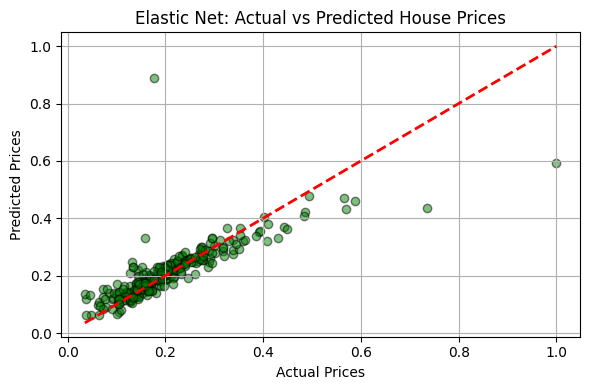

In [72]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.5, color='green', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Elastic Net: Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

In [73]:
from sklearn.linear_model import ElasticNetCV

# Define ranges for alpha and l1_ratio
alphas = np.logspace(-4, 1, 50)
l1_ratios = np.linspace(0.1, 0.9, 9)

# ElasticNet with cross-validation
elastic_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5, max_iter=10000)
elastic_cv.fit(X_train, y_train)

# Evaluate
print("Best alpha (ElasticNet):", elastic_cv.alpha_)
print("Best l1_ratio:", elastic_cv.l1_ratio_)
y_pred_elastic = elastic_cv.predict(X_test)
print("ElasticNet R2 Score:", r2_score(y_test, y_pred_elastic))
print("ElasticNet RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_elastic)))

Best alpha (ElasticNet): 0.0002559547922699536
Best l1_ratio: 0.2
ElasticNet R2 Score: 0.659562685746055
ElasticNet RMSE: 0.06544067150121977
